# Artificial Intelligence
## Assignment 2 – Local Search & Optimization

### Personal details

* **Name:** Ahmed Jabir Zuhayr
* **Student ID:** 2307677

In [1]:
# Dependencies:
# pip install matplotlib
# pip install numpy

import matplotlib.pyplot as plt
import numpy as np
import random

In this assignment, you will implement local search algorithms to solve an optimization problem. We will consider a form of the **Traveling Salesman Problem** (TSP) where the goal is to not only to find the shortest path from one site to another, but to find the shortest path *while visiting all sites exactly once* and returning to the starting point.

### 2.1 – Traveling Salesdrone Problem

![drone.png](drone.png)

<small>Image generated with the "Imagen 4.0 Ultra Generate Preview 06-06 v2" model on LMArena</small>

A modern version of the TSP involves an aerial drone beginning at a central warehouse and delivering packages to various destinations within a city. For this to be as cost-effective as possible, the drone should minimize the total distance traveled while ensuring that each destination is visited exactly once.

We start by defining the locations of the sites in a 2D space. The `(x, y)` coordinates of the sites are given in the `sites` variable, which is a list of tuples. We can then visualize these sites on a 2D plane and plot one possible route that simply visits all sites in the order they are defined.

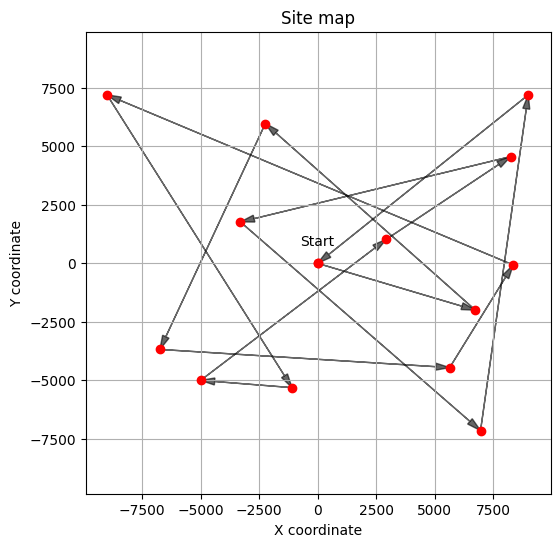

In [2]:
sites = [
    (0, 0), (6744, -2002), (-2235, 5974), (-6742, -3678), (5643, -4453),
    (8355, -68), (-9000, 7200), (-1095, -5311), (-5000, -5000), (2930, 1025),
    (8243, 4562), (-3300, 1770), (6960, -7146), (9000, 7200), (0, 0)
]

def plot_sites(sites):
    """
    Plots the current ordering of sites given as input with arrows indicating the path.
    """
    plt.figure(figsize=(6, 6))
    xs, ys = zip(*sites)
    plt.plot(xs, ys, 'ro')
    plt.annotate('Start', xy=(0, 0), xytext=(-750, 750))
    for i in range(len(sites) - 1):
        x_start, y_start = sites[i]
        x_end, y_end = sites[i + 1]
        plt.arrow(x_start, y_start, x_end - x_start, y_end - y_start,
                  length_includes_head=True, head_width=300, head_length=600, fc='black', ec='black', alpha=0.6)
    plt.title('Site map')
    plt.xlabel('X coordinate')
    plt.ylabel('Y coordinate')
    plt.grid(True)
    plt.axis('equal')
    plt.show()

plot_sites(sites)


(Note some of the simplifying assumptions being made here: the drone has unlimited battery, can carry an arbitrary amount of weight, and can fly in a straight line between any two points. More challenging versions of the problem could be formulated e.g. by adding a maximum distance the drone can fly before needing to return to a charging station, or by adding a maximum weight the drone can carry, which would require it to make multiple trips to deliver all packages.)

We can now calculate the total distance of a given ordering of sites using the Euclidean distance formula.

In [3]:
def euclidean_distance(site1, site2):
    """
    Computes the Euclidean distance between two sites.
    """
    return ((site1[0] - site2[0]) ** 2 + (site1[1] - site2[1]) ** 2) ** 0.5

def evaluate(sites):
    """
    Evaluates the total distance traveled by visiting the sites in the given order.
    """
    total_distance = 0
    for i in range(len(sites) - 1):
        total_distance += euclidean_distance(sites[i], sites[i + 1])
    return round(total_distance)

distance = evaluate(sites)
print(f"Total distance by traveling the sites in order: {distance}")

Total distance by traveling the sites in order: 152621


It is highly unlikely that we managed to define the sites in such a way that the initial ordering is the optimal one. Therefore, we will use local search algorithms to find a better ordering of sites that aims to minimize the total distance traveled.

### 2.2 – Hill Climbing

**Hill climbing** is the simplest local search algorithm. It starts from some initial state and makes small changes to the state, accepting only those changes that improve some objective function. In our case, this is the total distance traveled by the drone. The algorithm continues to make changes until no further improvements can be made.

An important aspect of local search algorithms is the definition of a *neighbor*. If we were optimizing a simple mathematical function of one variable, the neighbors could be defined as the states that are some fixed step to the left or right of the current state. In this case hill-climbing would simply mean evaluating whether moving left or right improves the objective function, then taking a step in that direction, and repeating the process until a local maximum is reached.

In our case, the neighbors of a given ordering of sites can be defined as the orderings that can be obtained by swapping two sites in the current ordering. For example, if the current ordering is `[A, B, C, D, A]`, we can generate a total of three neighbors (note that the first and last sites are fixed) as follows:

- Swap `B` and `C`: `[A, C, B, D, A]`
- Swap `B` and `D`: `[A, D, C, B, A]`
- Swap `C` and `D`: `[A, B, D, C, A]`

The algorithm will then evaluate the total distance for each of these neighbors and choose the one that has the lowest distance for the next step. It will keep taking steps in this way until it reaches a state where no neighbor has a lower evaluation than the current state.

**Task 1: Hill Climbing Search (0.4 pt)**

Your first task is to implement the hill climbing algorithm with the help of the given `evaluate` and `get_neighbors` helpers. The `hill_climbing_search` function should take a list of sites as input and return the best ordering of sites found by the algorithm.

(Hint: there are more or less complicated ways of achieving this, but if you want to follow the pseudocode in the lecture slides or textbook, you may want to define a `get_best_neighbor` helper function. Also notice that we are working with a *minimization problem*, so our hill climbing variant should perform *steepest descent*.)

Shortest distance found with hill-climbing search: 85266


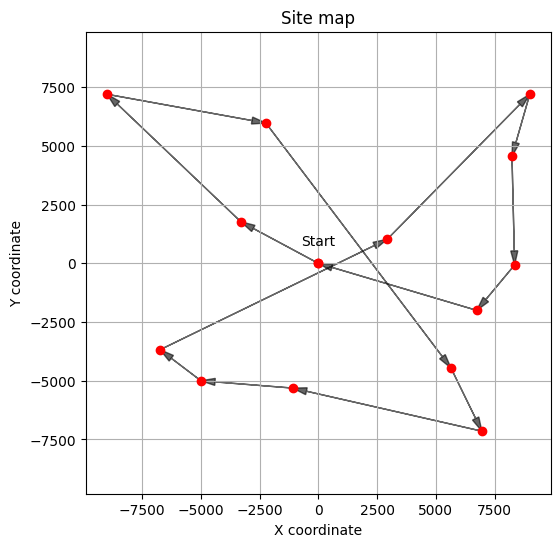

In [4]:
def get_neighbors(ordering):
    """
    Generates a list of neighboring orderings by swapping two sites while keeping the first and last sites fixed.
    """
    neighbors = []
    for i in range(1, len(ordering) - 1):
        for j in range(i + 1, len(ordering) - 1):
            # Swap sites i and j to create a neighbor
            neighbor = ordering[:]
            neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
            neighbors.append(neighbor)
    return neighbors

# ---------- YOUR CODE HERE (OPTIONAL) ----------- #

# Optional helper functions can be defined here
def get_best_neighbor(neighbors):
    return min(neighbors, key=evaluate)


# ---------- YOUR CODE HERE (OPTIONAL) ----------- #

def hill_climbing_search(ordering):
    current_minima = evaluate(ordering)
    while True:
    # ---------- YOUR CODE HERE ----------- #
        # 1. Get the highest-valued neighbor of the current ordering
        neighbors = get_neighbors(ordering)
        best_neighbor = get_best_neighbor(neighbors)

        # 2. If no neighbor is better, return the current ordering
        if evaluate(best_neighbor) >= current_minima:
            return ordering
        # 3. Otherwise, update the current ordering
        ordering = best_neighbor
        current_minima = evaluate(ordering)

    # ---------- YOUR CODE HERE ----------- #    

best_ordering = hill_climbing_search(sites)      
print(f"Shortest distance found with hill-climbing search: {evaluate(best_ordering)}")
plot_sites(best_ordering)

Steepest descent hill climbing is deterministic and always returns the same ordering of sites when given the same initial ordering. This may lead you to believe the optimal solution has been found. However, this is not necessarily the case.

What the algorithm has found is a **local optimum**. No solution can be generated *by swapping two sites in the current ordering* that would result in an improvement. Better solutions may exist, but they require more than one swap to reach. This would mean first moving to a worse state, then discovering a much better state and moving there, which is not allowed by the hill climbing algorithm.

**Task 2: Random Restart Hill Climbing (0.2 pt)**

One way of overcoming this limitation without changing the algorithm itself is to use *random restarts*. This means running hill climbing multiple times, each time starting from a different initial ordering of sites. Theoretically we will eventually generate the global optimum as an initial ordering as the number of iterations approaches infinity, but when combined with hill climbing, very good solutions can often be found in just a few iterations.

Your second task is to complete the `random_restart_hill_climbing` function below.

Shortest distance found with random restart hill climbing: 71277


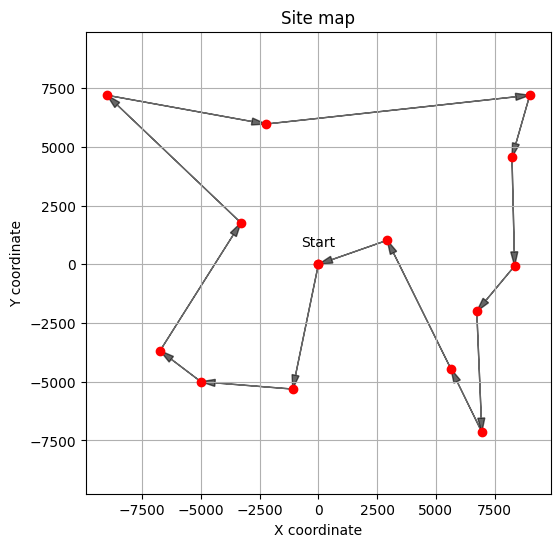

In [5]:
def random_restart_hill_climbing(sites, iterations):
    best_distance = np.inf
    best_ordering = sites

    for _ in range(iterations):
        # 1. Start from random ordering while keeping the first and last sites fixed
        ordering = [sites[0]] + random.sample(sites[1:-1], len(sites) - 2) + [sites[-1]]

        # ---------- YOUR CODE HERE ----------- #
        # 2. Perform hill climbing on the random ordering
        current_solution = hill_climbing_search(ordering)
    
        # 3. Evaluate the solution
        current_distance = evaluate(current_solution)

        # 4. If the solution is better than the best one found so far, save it
        if current_distance < best_distance:
            best_distance = current_distance
            best_ordering = current_solution

        # ---------- YOUR CODE HERE ----------- #

    # 5. Return the best ordering found
    return best_ordering

best_ordering = random_restart_hill_climbing(sites, iterations=20)
print(f"Shortest distance found with random restart hill climbing: {evaluate(best_ordering)}")
plot_sites(best_ordering)

As you will see by running your code multiple times, the results of `random_restart_hill_climbing` are non-deterministic. As we increase the number of iterations, the probability of finding a better solution increases, but at the cost of increased computation time. You can experiment with different values for the `iterations` parameter to see how it affects the results.

### 2.3 – Simulated Annealing

There are many ways of approaching the problem of getting stuck at local optima. One popular method is **simulated annealing**, which is inspired by the physical process of annealing in metallurgy. The idea is to allow the algorithm to accept worse solutions with a certain probability that *decreases over time*. Ideally this allows the algorithm to escape local optima and eventually converge to a global optimum.

Important concepts in simulated annealing are the **temperature** and the **cooling rate**. The temperature is a parameter that controls the probability of accepting worse solutions. At high temperatures, the algorithm is more likely to accept worse solutions, while at low temperatures it becomes more selective in only accepting improvements. The cooling rate is a parameter that controls how quickly the temperature decreases over time. These parameters can be summed up as the **annealing (or cooling) schedule**, for which there many, [many](https://www.fys.ku.dk/~andresen/BAhome/ownpapers/perm-annealSched.pdf) different approaches.

We should also consider the quality of each proposed solution. While the algorithm should always accept an improvement, it should also accept a worse solution with a probability that is proportional to the resulting difference in the objective function when moving from one state to another. One commonly used formula for this is:

$$P = \exp\left(\frac{\Delta}{T}\right)$$

which is called the **Metropolis criterion**. Here $\Delta$ is the difference in evaluation between the proposed solution and the previous one, and $T$ is the current temperature.

How should we interpret $P$, then? It is simply the probability of accepting the proposed solution and can be programmatically tested against a random number generator. Say we call [random](https://docs.python.org/3/library/random.html#random.random) to generate a random float between 0 and 1. If $P$ is greater than this number, we accept the proposed solution. If not, we reject it and continue on to the next iteration.

**Example.** Let's say $P = 0.8$. This means that there is an 80% chance of accepting the proposed solution. Any float generated by `random` that is between 0 and 0.8 will result in the proposed solution being accepted, while any float between 0.8 and 1 will result in it being rejected.

**Task 3: Simulated Annealing (0.4 pt)**

Your final task is to implement the simulated annealing algorithm. Here are some suggestions for the cooling schedule:

- Linear cooling: $T = T - \alpha$, where $\alpha$ is a small constant (e.g. 1)
- Exponential cooling: $T = T \cdot \alpha$, where $\alpha$ is a constant between 0 and 1 (e.g. 0.95)
- Start with a high temperature (e.g. 1000) and decrease it gradually with each iteration

As before, `simulated_annealing` should take a list of sites as input and return the best ordering of sites found by the algorithm. You should experiment with different values for the cooling schedule parameters to see how they affect the results.

Shortest distance found with simulated annealing: 73808


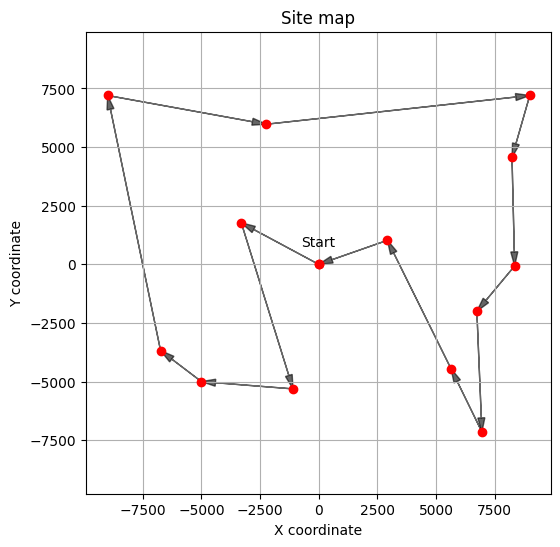

In [9]:
import math
import random

def simulated_annealing(sites):
    # Start from random ordering while keeping the first and last sites fixed
    current_ordering = [sites[0]] + random.sample(sites[1:-1], len(sites) - 2) + [sites[-1]]
    current_distance = evaluate(current_ordering)

    # ---------- YOUR CODE HERE ----------- #
    # 1. Initialize the cooling parameters
    T = 3000
    alpha = 0.99

    # 2. Keep iterating until the temperature is low enough 
    # (Note that if you're using exponential cooling, T will never reach 0)
    while T > 1e-21:
        # 3. Get a random neighbor of the current ordering
        # (Hint: random.choice(neighbors))
        neighbors = get_neighbors(current_ordering)
        current_neighbor = random.choice(neighbors)
        # 4. Calculate the difference in distance between the current ordering and the neighbor
        diff = evaluate(current_neighbor) - evaluate(current_ordering)
        
        # 5. If the neighbor is better, accept it as the current solution
        if diff < 0:
            current_ordering = current_neighbor
            current_distance = evaluate(current_neighbor)
            
        # 6. If the neighbor is worse, accept it with a probability based on the Metropolis criterion
        if diff > 0:
            exp_term = -diff / T
            probability = math.exp(exp_term)
            if random.random() <= probability:
                current_ordering = current_neighbor
                current_distance = evaluate(current_neighbor)
        # 7. Update the temperature
        T = T - alpha
    # 8. Return the current ordering
    return current_ordering

    # ---------- YOUR CODE HERE ----------- #
            
best_ordering = simulated_annealing(sites)
            
print(f"Shortest distance found with simulated annealing: {evaluate(best_ordering)}")
plot_sites(best_ordering)

The results of simulated annealing are also non-deterministic. The following block tests your code by running ten iterations of the `simulated_annealing` function and averaging the results. Your implementation should achieve an average distance of less than 75 000 over these runs while keeping the computation time reasonable (less than ~10 s).

In [7]:
results = []
best_result = np.inf
for _ in range(10):
    ordering = simulated_annealing(sites)
    result = evaluate(ordering)
    if result < best_result:
        best_result = result
    results.append(result)
average_distance = sum(results) / len(results)
print(f"Average distance over 10 runs of simulated annealing: {average_distance:.0f}")
print(f"(Shortest distance found: {best_result})")

Average distance over 10 runs of simulated annealing: 75584
(Shortest distance found: 67773)


### EXTRA: Discussion

**As discussed previously, hill climbing has the problem of getting stuck at local optima. Can you think of a pitfall that applies to simulated annealing as it is implemented here? How could you overcome it?**

Theoritically, if T is cooled down at an infitesinimal rate, probability of approaching a global optima should approach 1 in simulated annealing. However, in practice, cooling down too fast will cause us to degenerate back into Hill Climbing Local Minima problem. Furthermore, as T goes smaller and smaller, probability of accepting bad solutions reach 0, so our algorithm becomes identical to hill climb

## Aftermath

Please provide short answers to the following questions:

**1. Did you experience any issues or find anything particularly confusing?**

No

**2. Is there anything you would like to see improved in the assignment?**

No

### Submission

1. Make sure you have completed all tasks and filled in your personal details at the top of this notebook.
2. Ensure all the code runs without errors: restart the kernel and run all cells in order.
3. Submit *only* this notebook (`ex2.ipynb`) on Moodle.